# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


In [18]:
# Variables that interest me and their value counts:
# Improving & protecting environment (1 is too little and 3 is too much)
gss['natenvir'].value_counts()

0    26502
1    20868
2    10342
3     3049
8     1601
9      104
Name: natenvir, dtype: int64

In [19]:
# General happiness (1 is very happy and 3 is not too happy)
gss['happy'].value_counts()

2    32256
1    18122
3     7332
0     4383
9      338
8       35
Name: happy, dtype: int64

In [20]:
# Afraid to walk at night in neighborhood (1 is yes and 2 is no)
gss['fear'].value_counts()

0    24268
2    22694
1    15180
8      257
9       67
Name: fear, dtype: int64

In [21]:
# Age when first married
gss['agewed'].value_counts()

0     35717
21     3324
19     2886
18     2767
20     2719
22     2291
23     1980
24     1633
25     1477
17     1453
26      978
27      867
16      843
28      603
30      454
29      452
15      272
32      238
31      230
99      187
33      160
35      135
34      119
14      106
36       72
38       62
40       62
37       58
39       56
13       38
42       35
45       23
43       22
98       19
41       18
44       12
52        9
46        9
49        8
50        8
55        8
47        7
48        7
54        6
58        5
12        4
60        4
56        4
53        3
51        3
63        2
73        2
57        2
68        1
70        1
62        1
61        1
65        1
59        1
90        1
Name: agewed, dtype: int64

Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [22]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)
    df.natenvir.replace([8, 9, 0], np.nan, inplace=True)
    df.happy.replace([8, 9, 0], np.nan, inplace=True)
    df.fear.replace([8, 9, 0], np.nan, inplace=True)
    df.agewed.replace([98, 99, 0], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [5]:
# Gss year for this respondent
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [6]:
# 1 is male and 2 is female
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [7]:
# Age of respondent
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [8]:
# Year of birth
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
# 1 is white, 2 is black, and 3 is other
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
# Highest year of school completed
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
# Family income in constant $ (base = 1986)
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
# Weight variable
# QUESTION: how do I interpret this variable
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

In [23]:
gss['natenvir'].describe()

count    34259.000000
mean         1.479874
std          0.653915
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: natenvir, dtype: float64

Mean leans towards the too little side, stdev fairly large

In [24]:
gss['happy'].describe()

count    57710.000000
mean         1.813031
std          0.637273
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: happy, dtype: float64

Mean leans towards pretty happy state, stdev fairly large 

In [25]:
gss['fear'].describe()

count    37874.000000
mean         1.599197
std          0.490068
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: fear, dtype: float64

Mean leans toward not afraid side, stdev lower compared to happy and natenvir

In [26]:
gss['agewed'].describe()

count    26543.000000
mean        22.150058
std          4.885114
min         12.000000
25%         19.000000
50%         21.000000
75%         24.000000
max         90.000000
Name: agewed, dtype: float64

Mean is 22, which is quite young, stdev isn't too high considering range of values

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

QUESTION: where am I supposed to do the above exercise? 

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

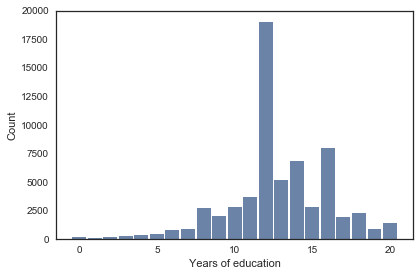

In [27]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

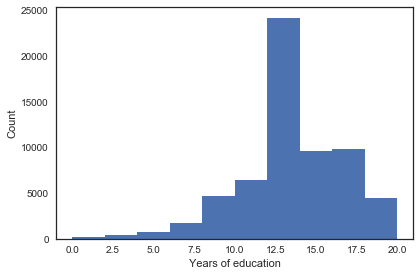

In [28]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna())
decorate(xlabel='Years of education', 
         ylabel='Count')

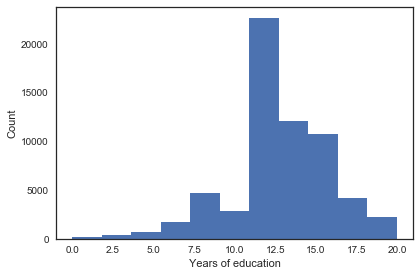

In [29]:
plt.hist(gss.educ.dropna(), bins=11)
decorate(xlabel='Years of education', 
         ylabel='Count') 

The increase from 10 bins to 11 bins results in a distribution that looks slightly differenet. There seems to be a little peak at 8 years.

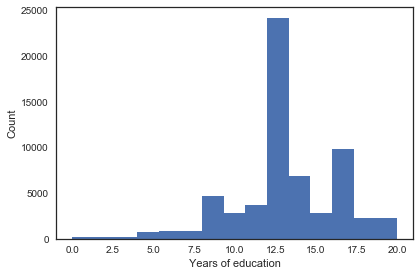

In [30]:
plt.hist(gss.educ.dropna(), bins=15)
decorate(xlabel='Years of education', 
         ylabel='Count') 

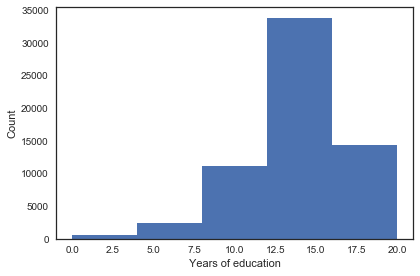

In [31]:
plt.hist(gss.educ.dropna(), bins=5)
decorate(xlabel='Years of education', 
         ylabel='Count') 

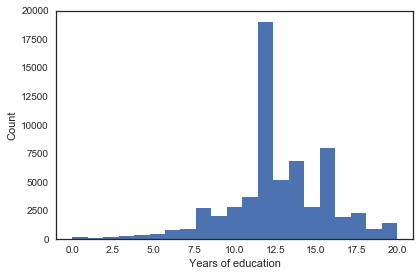

In [33]:
plt.hist(gss.educ.dropna(), bins=21)
decorate(xlabel='Years of education', 
         ylabel='Count') 

QUESTION: how do you determine optimal number of bins to use?

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

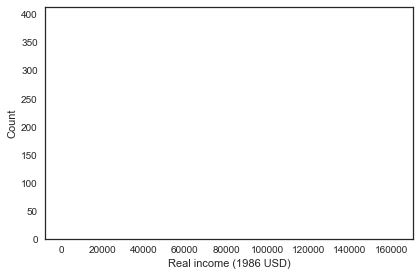

In [34]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

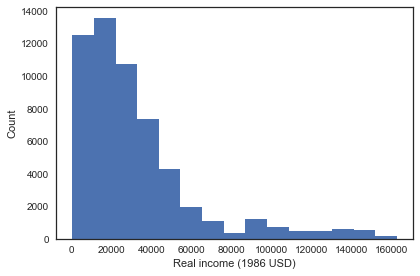

In [40]:
plt.hist(gss.realinc.dropna(), bins=15)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

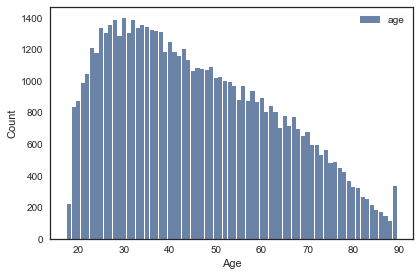

In [42]:
hist_age = Hist(gss.age, label='age')
thinkplot.Hist(hist_age)
decorate(xlabel='Age', ylabel='Count')

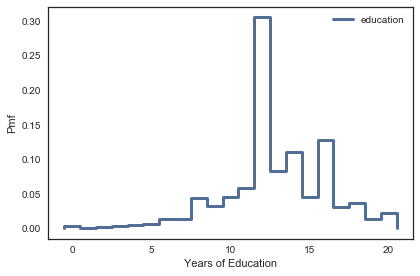

In [43]:
pmf_educ = Pmf(gss.educ, label='education')
thinkplot.Pmf(pmf_educ)
decorate(xlabel='Years of Education', ylabel='Pmf')

In [44]:
# Fraction of people with 12 years of education
pmf_educ.Prob(12)

0.3051114107750594

In [45]:
# Fraction of people with 14 years of education
pmf_educ.Prob(14)

0.10991780645989853

In [46]:
# Fraction of people with 16 years of education
pmf_educ.Prob(16)

0.12722339947344763

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

In [21]:
# Solution goes here

In [22]:
# Solution goes here

In [23]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

In [24]:
# Solution goes here

In [25]:
# Solution goes here

In [26]:
# Solution goes here

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

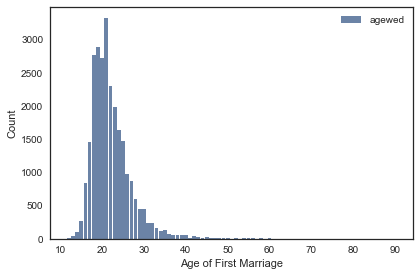

In [47]:
hist_agewed = Hist(gss['agewed'], label='agewed')
thinkplot.Hist(hist_agewed)
decorate(xlabel='Age of First Marriage', ylabel='Count')

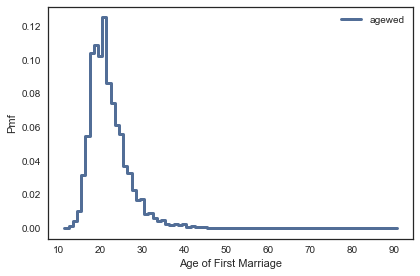

In [49]:
pmf_agewed = Pmf(gss['agewed'], label='agewed')
thinkplot.Pmf(pmf_agewed)
decorate(xlabel='Age of First Marriage', ylabel='Pmf')

In [29]:
# Solution goes here

In [30]:
# Solution goes here

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

In [31]:
# Solution goes here

In [32]:
# Solution goes here

In [33]:
# Solution goes here

In [34]:
# Solution goes here

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [35]:
# Solution goes here

In [36]:
# Solution goes here

In [37]:
# Solution goes here

In [38]:
# Solution goes here

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [39]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [40]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [41]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape